Day-7

### 1. Load the “iris” dataset and perform k-nearest neighbor classification. Plot the accuracy/error w.r.t different k values. Compare the accuracy with the built-in function of ***k-NN (K Nearest Neighbors)***.

### The program can be written Python programming language from scratch. No machine learning/data science/statistics package/library should be used.

In [118]:
# K NEARSET NEIGHBORS.

In [119]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [120]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [121]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [122]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [123]:
df.shape

(150, 4)

In [124]:
# Adding the 'target' column in the dataset having columns 'feature_names'.
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [125]:
df.shape

(150, 5)

In [126]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [127]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [128]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

Sepal Length Vs Sepal Width (Setosa Vs Versicolor)

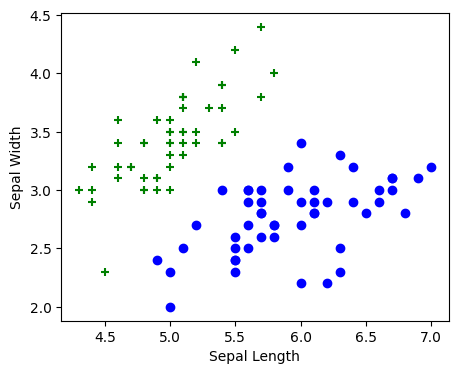

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green',marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color='blue')


Petal Length Vs Petal Width (Setosa Vs Versicolor)

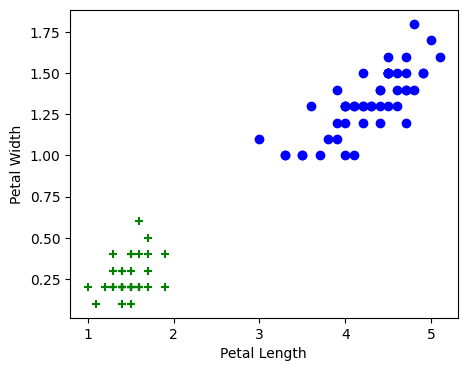

In [130]:
plt.figure(figsize=(5,4))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green',marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='blue')


Train Test Split

In [131]:
from sklearn.model_selection import train_test_split
x=df.drop(['target'],axis='columns')
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [132]:
print(len(x_train))
print(len(x_test))

120
30


# Create K-NN

In [133]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [134]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [135]:
knn.score(x_test,y_test)

1.0

In [136]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

Text(33.22222222222222, 0.5, 'Truth')

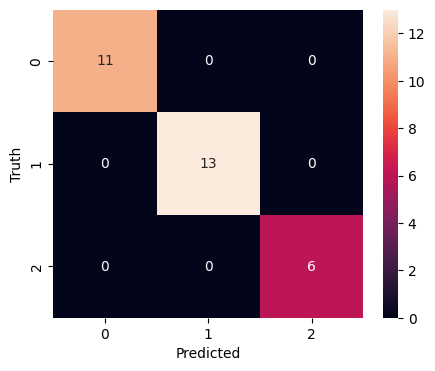

In [137]:
# Plotting Confusion matrix using seaborn
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [138]:
# Checking the accuracy of the trained model.
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# END

# ***NEXT PROBLEM***
    

Day-8

### 1. For a given dataset (e.g. iris data set) D of size N×M with N:Number of samples and M: number of features, design a Bayesian classifier/ Support vector machine/ Decision tree  to classify the test data. Divide the data set into training or testing data according to random percentage split. (assume the underlying distribution to Gaussian).

In [140]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# GaussianNB implements the Gaussian Naive Bayes algorithm for classification.
from sklearn.datasets import load_breast_cancer
breast_cancer=load_breast_cancer()

In [141]:
cancer_data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [142]:
cancer_data['target']=breast_cancer.target
# Target labels (0 for malignant, 1 for benign)
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [143]:
cancer_data.shape

(569, 31)

In [144]:
cancer_data.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [145]:
X=cancer_data.drop(['target'],axis='columns')
Y=cancer_data.target

In [146]:
# Split the dataset.
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.8,random_state=3)

In [147]:
Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape

((113, 30), (456, 30), (113,), (456,))

In [148]:
# Training the dataset.
gnb=GaussianNB()
gnb.fit(Xtrain,Ytrain)

GaussianNB()

In [149]:

# Checking the accuracy of the model.
Ypred=gnb.predict(Xtest)
accuracy_score(Ytest,Ypred)

0.9473684210526315

Text(33.22222222222222, 0.5, 'Truth')

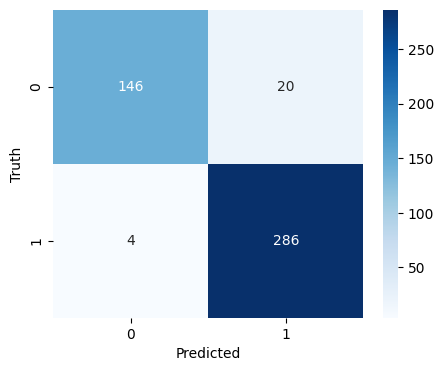

In [150]:
con_mat=confusion_matrix(Ytest,Ypred)
plt.figure(figsize=(5,4))
sns.heatmap(con_mat,annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [151]:
import numpy
input_data=(9.777,16.99,62.5,290.2,0.1037,0.08404,0.04334,0.01778,0.1584,0.07065,0.403,1.424,2.747,22.87,0.01385,0.02932,0.02722,0.01023,
            0.03281,0.004638,11.05,21.47,71.68,367,0.1467,0.1765,0.13,0.05334,0.2533,0.08468)
input_data_as_numpy_array=numpy.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=gnb.predict(input_data_reshaped)
print(prediction)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# ***END***